In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt

# Functions, loops and branching

The following exercises let you practice Python syntax. Do not use any packages not in the [standard library](https://docs.python.org/3/library/) except for `matplotlib.pyplot` which has been imported for you.

If you have not done much programming, these exercises will be challenging. Don't give up!

**1**. Grading (20 points)

- Write a function to assign grades to a student such that 
```
A = [90 - 100]
B = [80 - 90)
C = [65 - 80)
D = [0, 65]
```

where square brackets indicate inclusive boundaries and parentheses indicate exclusive boundaries. However, studens whose attendance is 12 days or fewer get their grade reduced by one (A to B, B to C, C to D, and D stays D). The function should take a score and an attendance as an argument and return A, B, C or D as appropriate.(10 points)
- Count the number of students with each grade from the given scores. (10 points)

In [3]:
scores = [ 84,  76,  67,  23,  83,  23,  50, 100,  32,  84,  22,  41,  27,
        29,  71,  85,  47,  77,  39,  25,  85,  69,  22,  66, 100,  92,
        97,  46,  81,  88,  67,  20,  52,  62,  39,  36,  79,  54,  74,
        64,  33,  68,  85,  69,  84,  30,  68, 100,  71,  33,  21,  95,
        92,  72,  53,  50,  31,  82,  53,  68,  49,  37,  40,  21,  94,
        30,  54,  58,  92,  95,  73,  80,  81,  56,  44,  22,  69,  70,
        25,  50,  59,  32,  65,  79,  27,  62,  27,  31,  78,  88,  68,
        53,  79,  69,  89,  38,  80,  55,  92,  55]

attendances = [17, 19, 21, 14, 10, 20, 14,  9,  6, 21,  5, 23, 21,  4,  5, 21, 20,
        2, 14, 14, 21, 22,  3,  0, 11,  0,  0,  4, 20, 14, 23, 16, 24,  5,
       12, 11, 22, 20, 15, 23,  0, 20, 20,  6,  4, 14,  6, 18, 17,  0, 18,
        6,  3, 19, 24,  7,  9, 15, 18, 10,  2, 15, 21,  2,  9, 21, 20, 11,
       24, 23, 14, 22,  4, 12,  7, 19,  6, 18, 23,  6, 14,  6,  1, 12,  7,
       11, 22, 21,  7, 22, 24,  4, 10, 17, 21, 15,  0, 20,  3, 20]

In [4]:
# Your answer here





**2**. The period doubling route to chaos. (25 points)

- Write a function $f(x, r) = rx(1-x)$ where $r$ is some real number. What is the value of $f(0.3, 2)$? (5 points)
- Using a for loop that increments the value of $r$ from 0.1 to 4.0 in steps of 0.1, save the last 50 terms in the iterated sequence $x_{n+1} = f(x_n, r)$ stopping at $x_{1000}$ for each value of $r$. Use $x_0 = 0.13$ for each value of $r$(10 points)
- Make a scatter plot of each $(r, x)$ value with $r$ on the horizontal axis and $x$ on the vertical axis. Use the `plt.scatter` function with `s=1` to make the plot. (10 points)

In [5]:
# Your answer here





In [6]:
def f(x, r):
    """The discrete logistic function."""
    
    return r*x*(1-x)

In [7]:
f(0.3, 2)

0.42

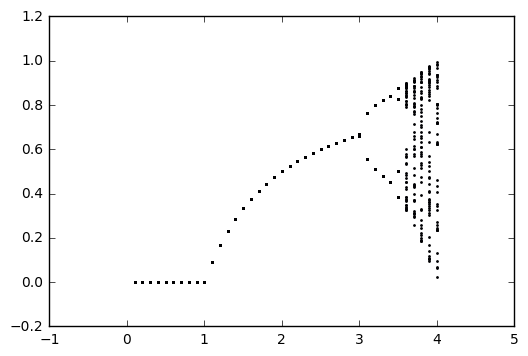

In [8]:
xs = []
rs = []
for i in range(1, 41):
    r = i/10.0
    x = 0.13
    for j in range(1001 - 50):
        x = f(x, r)
    for j in range(50):
        x = f(x, r)
        xs.append(x)
        rs.append(r)

plt.scatter(rs, xs, s=1)
pass

**3**. Digit product sequences. (25 points)

A digit product sequence starts with a number $n_1$, then the ith number, $n_i$ in the sequence is obtained by multiplying the non-zero digits of $n_{i-1}$ and adding that product to $n_{i-1}$. For example, if $n_1$ is 1, we have

```
1, 2, 4, 8, 16, 22, 26, 38, ...
```

- Find the first 100 numbers in the sequence above. Print out the first 10. (10 points)
- Choose a starting $n_1$ different from 1 and generate its sequence. At some point, this new sequence will become identical with the sequence starting from 1 (this is known as joining). For $n_1 = 2$, joining occurs trivially at position 1 (counting from 0) of the 1-sequence. For $n_1 = 3$, the sequence is 

```
3, 6, 12, 14, 18, 26, 38, 62, 74, 102, ...
```

and we see that the number 26 joins at position 6. Find the join value and position for sequences starting with 19. (15 points)

In [9]:
# Your answer here





In [10]:
def digits(n):
    """Return the elements of n in a list."""
    q, r = divmod(n, 10)
    ds = [r]
    while q != 0:
        q, r = divmod(q, 10)
        ds.append(r)
    return ds

In [11]:
def dps(n, k):
    """Return digit product sequence of length k starting with n."""
    seq = [n]
    for i in range(k):
        prod = 1
        for d in [i for i in digits(n) if i != 0]:
            prod *= d
        n = n + prod
        seq.append(n)
    return seq

In [12]:
s1 = dps(1, 10000)
print(s1[:10])

[1, 2, 4, 8, 16, 22, 26, 38, 62, 74]


In [13]:
s3 = dps(3, 100)
for s in s3:
    if s in s1:
        print(s, s1.index(s))
        break

26 6


In [14]:
s11 = dps(19, 100)
for s in s11:
    if s in s1:
        print(s, s1.index(s))
        break

102 10


**4**. The E. coli genome. (30 points)

- Write a program to download the [E. coli genomic sequence in FASTA format](https://www.genome.wisc.edu/pub/sequence/U00096.2.fas) (5 points)
- Open the downloaded file and read the entire sequence into a single string variable called `seq`, discarding the header information. Also remove any newline characters `\n` from `seq`. Print the first 100 letters in `seq` (10 points)
- Find and report the starting index (counting from zero) and length of the longest contiguous sequence of any nucleotide in `seq`. If there are ties, report the starting index and length of the last contiguous sequence found. For example, in `ATGACCCCCG` the longest contiguous sequence is `CCCC` which starts at index 4 and has length 5. (15 points)

In [15]:
# Your answer here





In [16]:
import urllib.request

url = "https://www.genome.wisc.edu/pub/sequence/U00096.2.fas"

filename = 'ecoli.fas'
urllib.request.urlretrieve(url, filename)

('ecoli.fas', <http.client.HTTPMessage at 0x7fcb207ca208>)

In [17]:
with open(filename) as f:
    lines = f.readlines()
seq = ''.join([line.strip() for line in lines[1:]])
seq[:100]

'agcttttcattctgactgcaacgggcaatatgtctctgtgtggattaaaaaaagagtgtctgatagcagcttctgaactggttacctgccgtgagtaaat'

In [18]:
def running(seq):
    """Find starting location and length of the last longest continuous sequence of elements in seq."""
    ref = seq[0]
    count = 0
    best = 0
    idx = 0
    for i in range(1, len(seq)):
        current = seq[i]
        if current == ref:
            count += 1
            if count > best:
                best = count
                idx = i
        else:
            ref = current
            count = 0
    return (idx - best, best + 1)

In [19]:
s = 'ATGACCCCCG'
running(s)

(4, 5)

In [20]:
running(seq)

(379236, 10)